# Principle Component Analysis (PCA)

### Key Equation: $Ax = \lambda b ~~ \text{for} ~~ n \times n $

PCA is an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on. This is an Unsupervised Learning Techniques - Which means we don't have a target variable.


In [6]:
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

# From 2 Dimension to 1 Dimension

Let us generate a two variable data set - $a,b$

$$ b = 50 + 3a + \epsilon$$ 

In [8]:
np.random.seed(123)

In [90]:
a = np.arange(12, 56, 0.5)
e = np.random.normal(0, 100, x.size)
b = 500 + 20*x + e

In [91]:
X = np.c_[a,b]

In [92]:
def plot2var (m, xlabel, ylabel):
    x = m[:,0]
    y = m[:,1]
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.scatter(x, y, s = 40, alpha = 0.8)
    sns.rugplot(x, color="m", ax=ax)
    sns.rugplot(y, color="m", vertical=True, ax=ax)
       
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

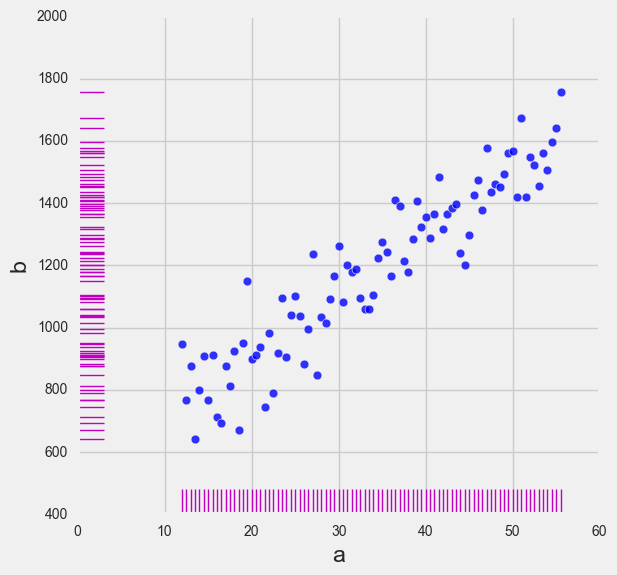

In [93]:
plot2var(X, 'a', 'b')

## Standardizing the Variables
**Centering the Variables** (Remove mean and divide by std dev)

In [94]:
X_mean = np.mean(X, axis=0)

In [96]:
X_mean

array([   33.75      ,  1181.93484974])

In [98]:
X_sd = np.std(X, axis=0)

In [99]:
X_sd

array([  12.7008858 ,  269.81866875])

In [100]:
X_std = np.subtract(X, X_mean) / X_sd

In [139]:
def plot2var_std (m, xlabel, ylabel):
    x = m[:,0]
    y = m[:,1]
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.scatter(x, y, s = 40, alpha = 0.8)
    sns.rugplot(x, color="m", ax=ax)
    sns.rugplot(y, color="m", vertical=True, ax=ax)
       
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.xlim([-3,3])
    plt.ylim([-3,3])

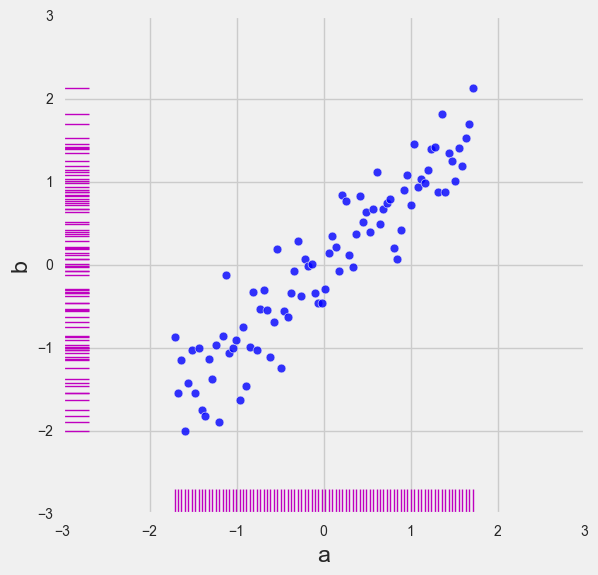

In [140]:
plot2var_std(X_std, "a", "b")

### Calculate the Covariance Matrix

In [79]:
cov_mat_2var = np.cov(input_2var_center.T)

In [80]:
cov_mat_2var

array([[ 1.01149425,  0.92226013],
       [ 0.92226013,  1.01149425]])

So now this is the symetric $A$ matrix we are trying to solve

$$ Ax = \lambda x $$

where 
$$ A = \begin{bmatrix} 1.01 & -0.92 \\ -0.92 & 1.01 \end{bmatrix} $$



## Get Eigen-vectors and Eigen-values
**Lets get the eigen-vectors for this matrix**

In [105]:
eigen_val_2var, eigen_vec_2var = np.linalg.eig(cov_mat_2var)

In [106]:
eigen_val_2var

array([ 1.93375438,  0.08923413])

In [107]:
eigen_vec_2var

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [108]:
eigen_vec_2var[1].dot(eigen_vec_2var[0])

0.0

So our eigen vectors and eigen values are:
$$ \lambda_1 = 1.93, \lambda_2 = 0.09 $$

$$ \vec{v_1} = \begin{bmatrix} 0.707 \\ -0.707\end{bmatrix} $$

$$ \vec{v_2} = \begin{bmatrix}  0.707 \\  0.707\end{bmatrix} $$

These are orthogonal to each other. Let us plots to see these eigen vectors


In [109]:
def plot2var_eigen (m, xlabel, ylabel):
    x = m[:,0]
    y = m[:,1]
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.scatter(x, y, s = 40, alpha = 0.8)
    sns.rugplot(x, color="m", ax=ax)
    sns.rugplot(y, color="m", vertical=True, ax=ax)
       
    cov_mat = np.cov(m.T)
    eigen_val, eigen_vec = np.linalg.eig(cov_mat)
    
    plt.quiver(eigen_vec[0, 0], eigen_vec[0, 1], angles='xy', scale_units='xy', scale=1, color='brown')
    plt.quiver(eigen_vec[1, 0], eigen_vec[1, 1], angles='xy', scale_units='xy', scale=1, color='brown')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.xlim(-3,3)
    plt.ylim(-3,3)

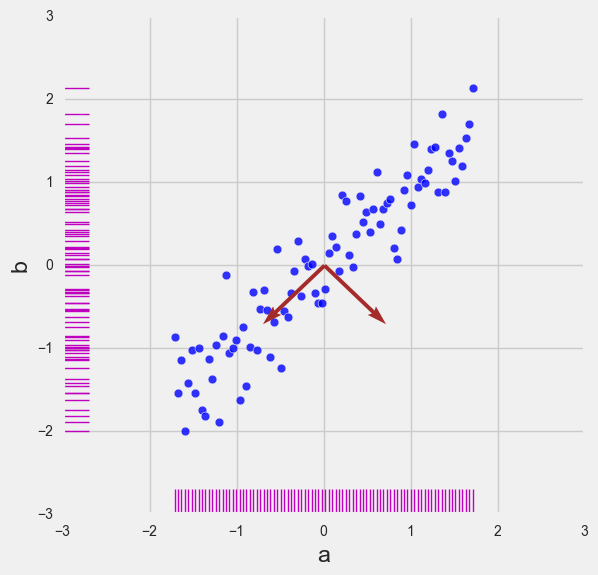

In [111]:
plot2var_eigen(X_std, 'a' ,'b')

# Projection Matrix
Let us project our orginal values to see the new results

In [112]:
eigen_vec_2var

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [113]:
X_std.T.shape

(2, 88)

In [114]:
eigen_vec_2var.shape

(2, 2)

In [115]:
X_proj = eigen_vec_2var.dot(X_std.T)

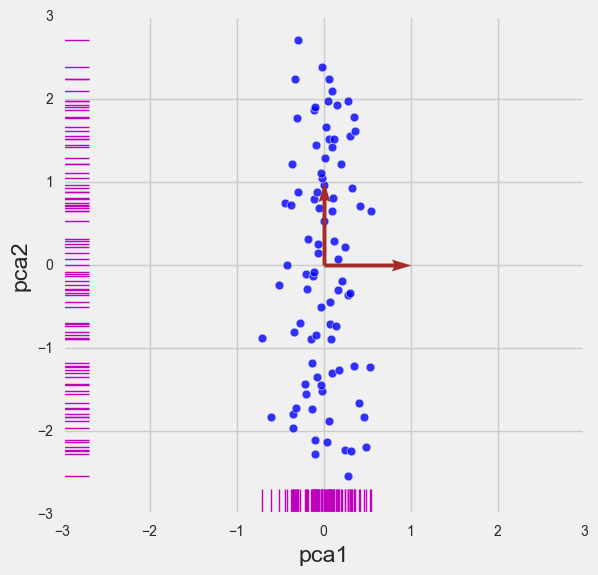

In [116]:
plot2var_eigen(X_proj.T, 'pca1' ,'pca2')

### Using PCA from SKlearn

In [82]:
from sklearn.decomposition import PCA

In [134]:
pca = PCA(n_components=2)

In [135]:
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [136]:
X_pca_proj = pca.transform(X_std)

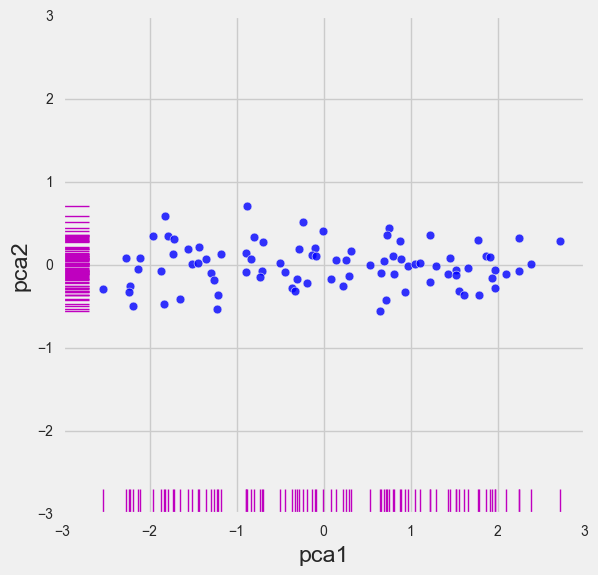

In [141]:
plot2var_std(X_pca_proj, 'pca1', 'pca2')

In [87]:
pca.explained_variance_

array([ 1.9117799,  0.0882201])

# From 4 Dimensions to 2 Dimensions

Run PCA with 2 dimensions on the cars dataset

In [145]:
pop = pd.read_csv('data/cars_small.csv')

In [146]:
pop.head()

,brand,model,price,kmpl,bhp,type
0,Chevrolet,Beat,421,18.6,79,Hatchback
1,Chevrolet,Sail,551,18.2,82,Sedan
2,Chevrolet,Sail Hatchback,468,18.2,82,Hatchback
3,Chevrolet,Spark,345,16.2,62,Hatchback
4,Fiat,Linea Classic,612,14.9,89,Sedan


### Preprocessing - brand, price, kmpl, bhp

In [147]:
pop = pop.drop(['model'], axis = 1)

In [148]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = pop.apply(le.fit_transform)

In [149]:
df.head()

,brand,price,kmpl,bhp,type
0,0,13,20,11,0
1,0,28,18,12,1
2,0,17,18,12,0
3,0,6,9,4,0
4,1,31,2,16,1


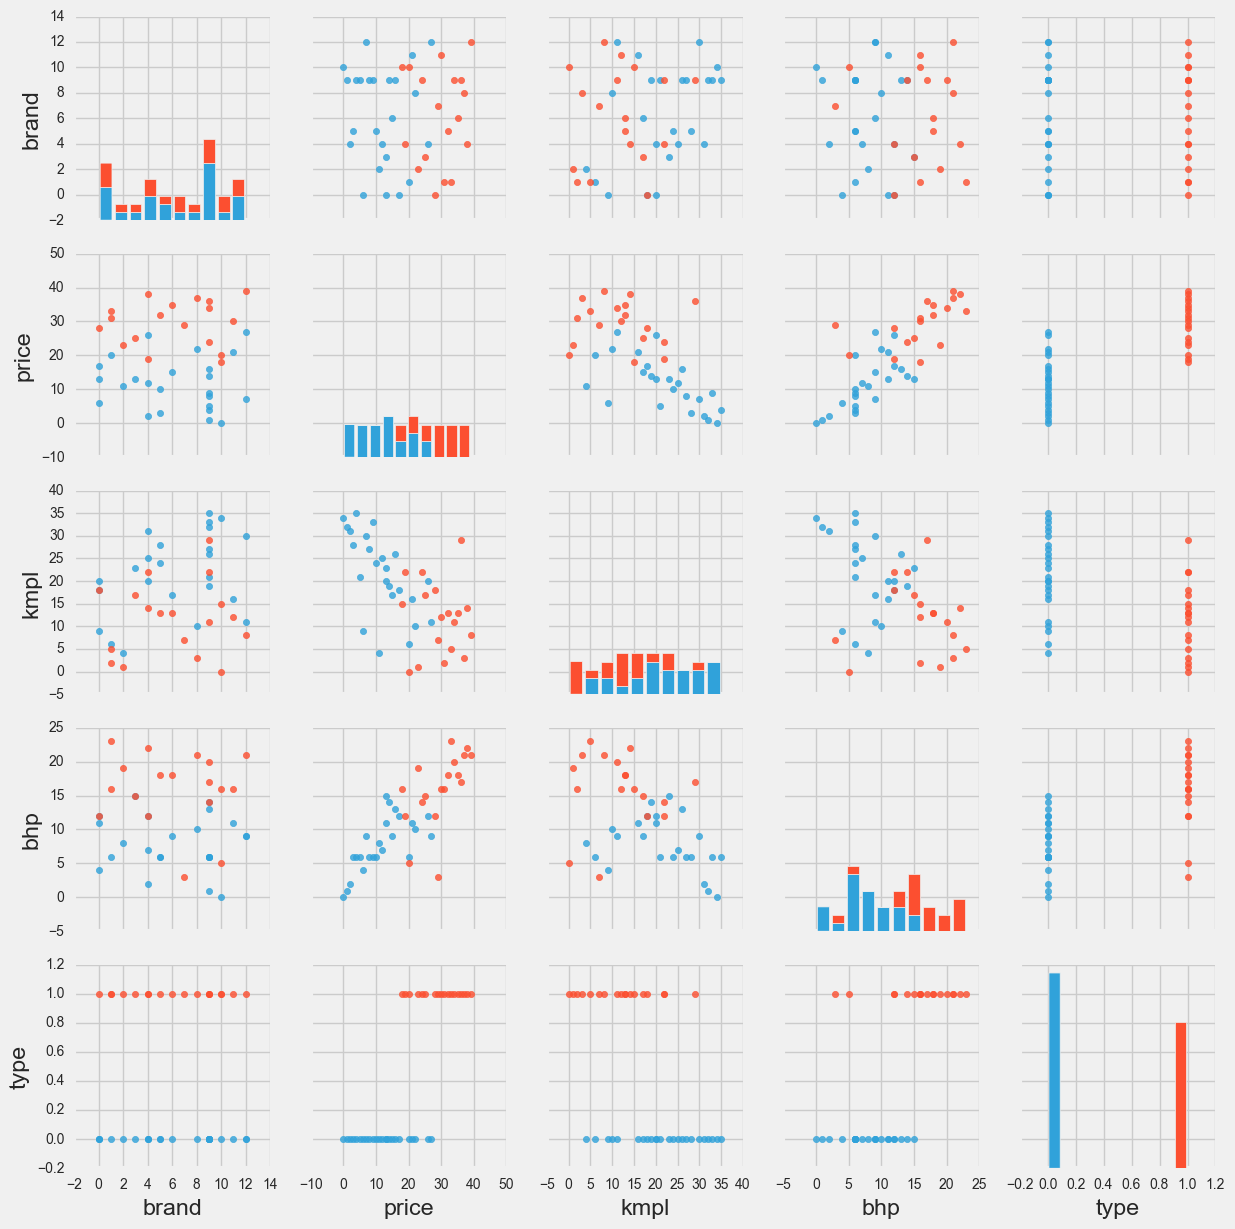

In [150]:
g = sns.PairGrid(df, hue = 'type')
g.map_di`ag(plt.hist)
g.map_offdiag(plt.scatter, alpha = 0.8)

### Standardizing

In [151]:
X = df.iloc[:,:4]

In [152]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

### Eigendecomposition - Computing Eigenvectors and Eigenvalues

In [153]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.02439024 -0.01272799  0.25803108 -0.07738538]
 [-0.01272799  1.02439024 -0.63611083  0.82877403]
 [ 0.25803108 -0.63611083  1.02439024 -0.46279843]
 [-0.07738538  0.82877403 -0.46279843  1.02439024]]


In [154]:
# Doing this directly using np.cov
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.02439024 -0.01272799  0.25803108 -0.07738538]
 [-0.01272799  1.02439024 -0.63611083  0.82877403]
 [ 0.25803108 -0.63611083  1.02439024 -0.46279843]
 [-0.07738538  0.82877403 -0.46279843  1.02439024]]


In [155]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [156]:
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.14151503 -0.92968525 -0.31696215  0.12326319]
 [-0.61287306 -0.22032736  0.0791158  -0.75470733]
 [ 0.52320382 -0.22131442  0.77419401 -0.27910809]
 [-0.57499381 -0.19534868  0.54212482  0.58079402]]

Eigenvalues 
[ 2.34792167  1.06653843  0.52967314  0.15342773]


How do you select which 2 axis to choose?

### Sorting the Eigenvalues and Eigenvectors
In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In [157]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [158]:
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [159]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.34792167381
1.06653842541
0.529673143408
0.153427732985


### Explained Variance
The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [160]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

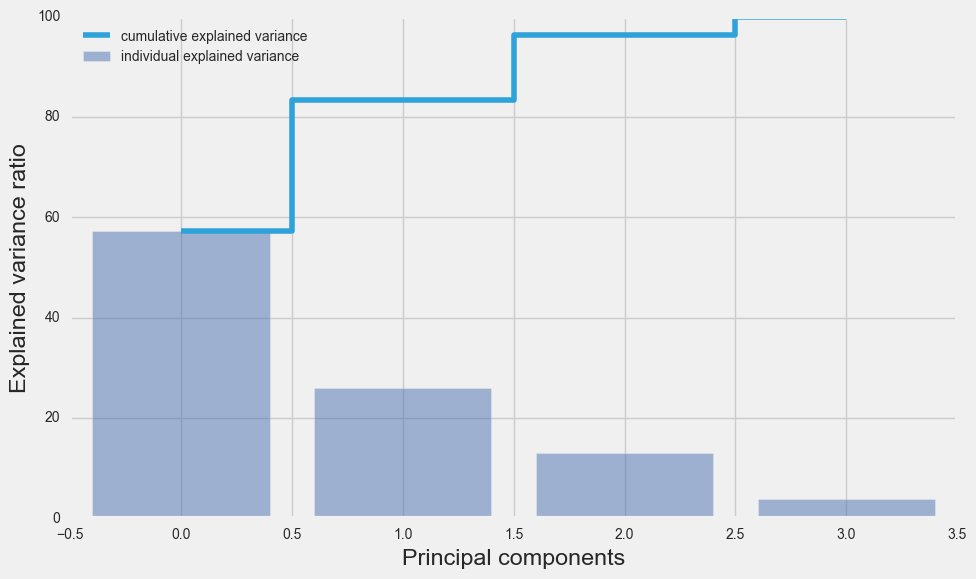

In [161]:
plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

### Projection Matrix
The “projection matrix” is just a matrix of our concatenated top k eigenvectors. Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our $n×k$-dimensional eigenvector matrix $W$.


In [162]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.14151503 -0.92968525]
 [-0.61287306 -0.22032736]
 [ 0.52320382 -0.22131442]
 [-0.57499381 -0.19534868]]


In [181]:
X_proj = X_std.dot(matrix_w)

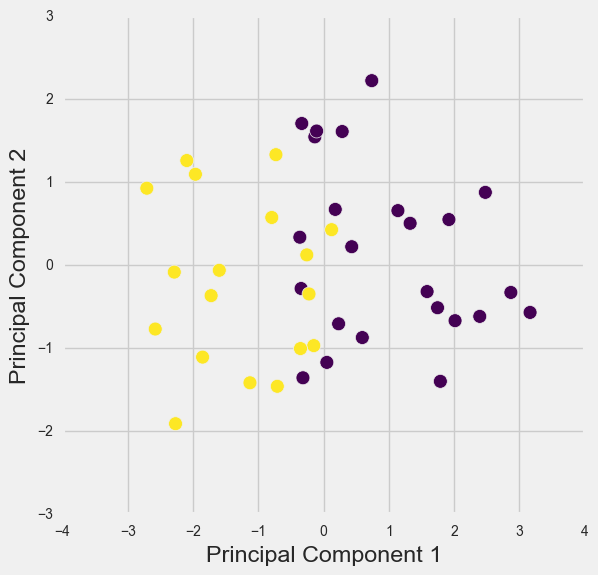

In [186]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_proj[:,0], X_proj[:,1], c = df.type, s = 100, cmap = plt.cm.viridis)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

## PCA using sklearn

In [163]:
from sklearn.decomposition import PCA

In [164]:
pca = PCA(n_components=2)

In [165]:
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [183]:
X_proj_sklearn = pca.transform(X_std)

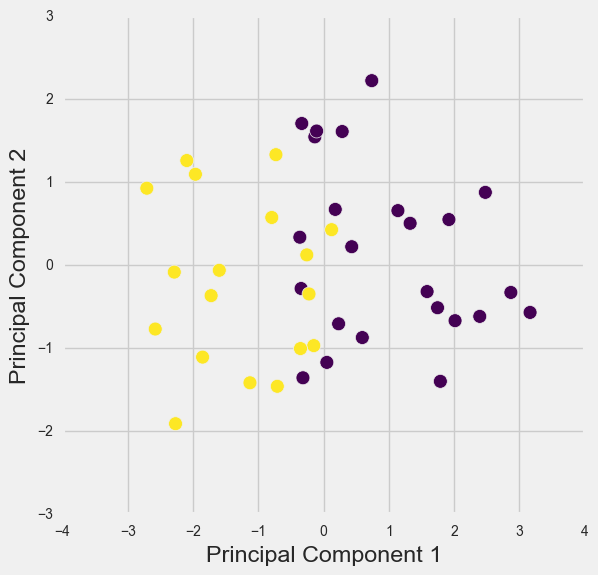

In [185]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_proj_sklearn[:,0], X_proj_sklearn[:,1], c = df.type, 
            s = 100, cmap = plt.cm.viridis)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [189]:
pca.explained_variance_

array([ 2.29201878,  1.04114465])

# From 784 Dimensions to 2 Dimensions


In [192]:
digits = pd.read_csv('data/digits.csv')

In [195]:
digits.head()

,num,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
digits.shape

(5234, 785)

In [206]:
digitsX = digits.iloc[:,1:785]

In [207]:
digitsX.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
pca = PCA(n_components=2)

In [208]:
pca.fit(digitsX)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [209]:
digits_trans = pca.transform(digitsX)

In [210]:
digits_trans

array([[ 1068.06173168,   117.11014619],
       [ -547.99896678,   650.78729053],
       [ -823.7682058 ,   -60.24167885],
       ..., 
       [ -806.20311964,   123.37314023],
       [  415.26422906,   325.0543717 ],
       [ 1054.28476501,   387.85701457]])

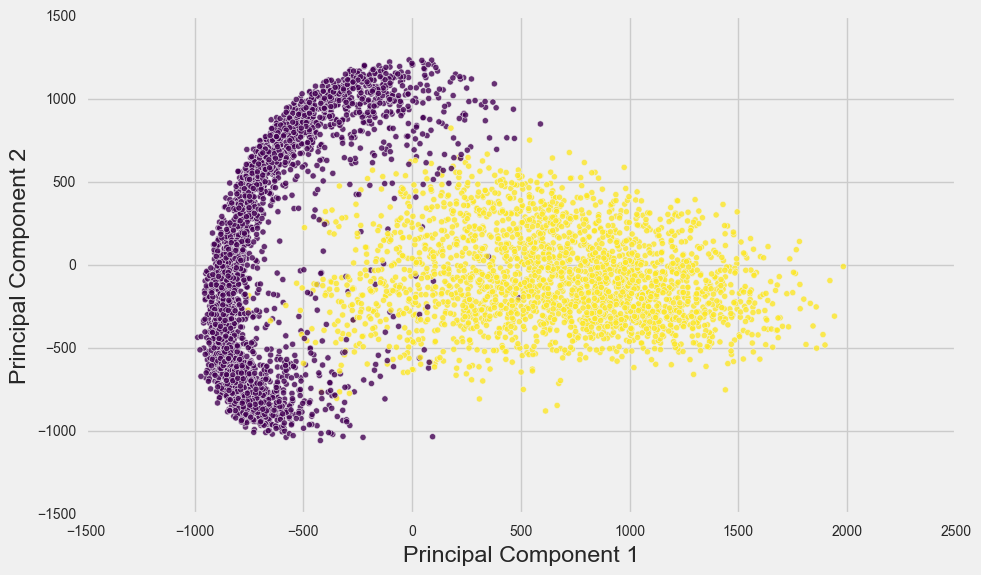

In [217]:
plt.scatter(digits_trans[:,0], digits_trans[:,1], c = digits.num, 
            s = 20, alpha = 0.8, cmap = plt.cm.viridis)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Exercise - Run PCA on the Bank Data